<a 
 href="https://colab.research.google.com/github/LearnPythonWithRune/FinancialDataAnalysisWithPython/blob/main/colab/starter/04 - Visualize DataFrames - Matplotlib.ipynb"
 target="_parent">
<img 
 src="https://colab.research.google.com/assets/colab-badge.svg"
alt="Open In Colab"/>
</a>

# 4. Visualization With Matplotlib

[Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

There are many Matplotlib tutorials, if you want learn more plese read:

- [Matplotlib Tutorial: Python Plotting from Datacamp](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python)
- [Python Plotting With Matplotlib (Guide) from RealPython](https://realpython.com/python-matplotlib-guide/)
- [Scientific Programming Blog](https://danielmuellerkomorowska.com/2020/07/05/matplotlib-and-the-object-oriented-interface/)

This practice will cover:

- Learn to use Matplotlib
- Subplots
- Multiple plots
- Bar plots

## Anatomy of a "Plot"

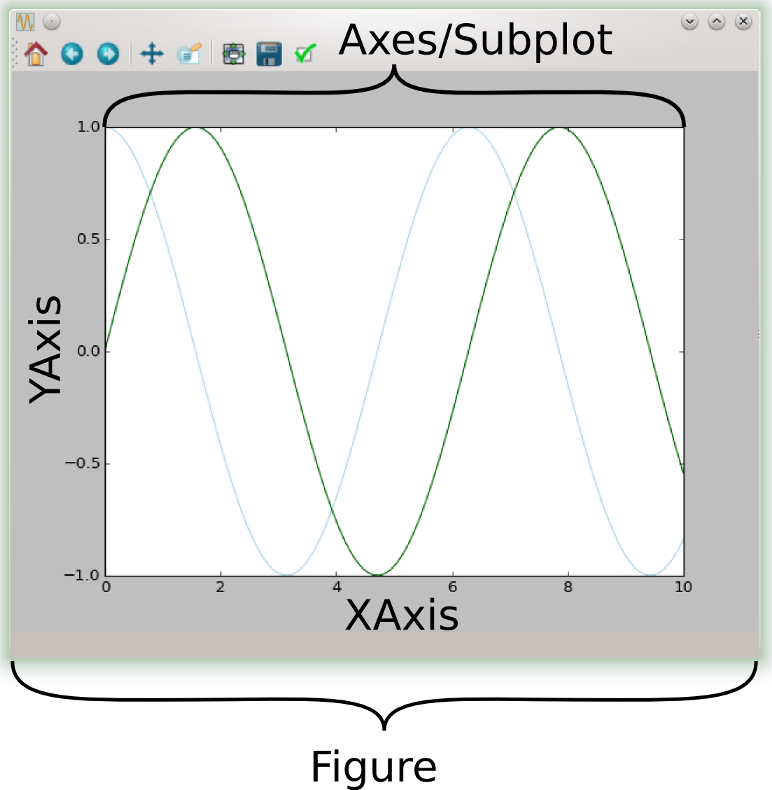

The **Figure** is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and Figures can contain multiple **Axes**.

Most **plotting** ocurs on an **Axes**. 

The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it. Usually we'll set up an Axes with a call to subplot (which places Axes on a regular grid), so in most cases, **Axes and Subplot are synonymous**.

Each Axes has an XAxis and a YAxis. These contain the ticks, tick locations, labels, etc. In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual Axis part of things all that much. However, it is worth mentioning here to explain where the term Axes comes from.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
#The %matplotlib notebook is important to tell Jupyter notebook how to visualize the results from our plots.

In [2]:
# load data and check
data = pd.read_csv("AAPL.csv", index_col= 0, parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400



## Plot using DataFrame. plot()

[DataFrame.plot(*args, **kwargs)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Make plots of Series or DataFrame.

Uses the backend specified by the option plotting.backend. By default, matplotlib is used.

<IPython.core.display.Javascript object>


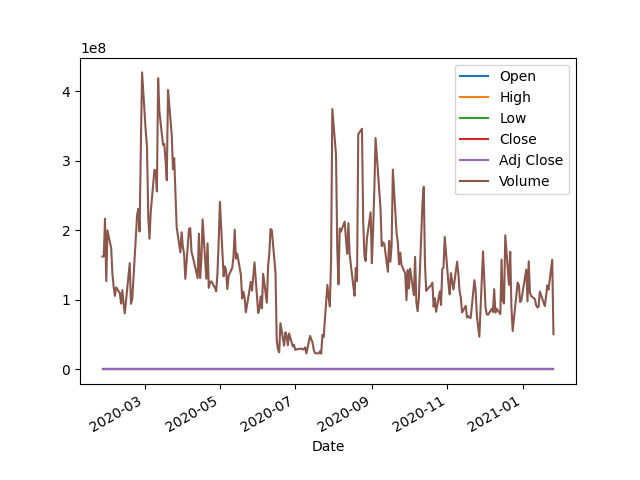

<AxesSubplot:xlabel='Date'>

In [9]:
data.plot()

In [8]:
data['Close'].plot()

<AxesSubplot:xlabel='Date'>

**Exam** this plot! Can you tell what is wrong with it?

Can you see other columns?  Why?  

Example the following code to see the differences

<IPython.core.display.Javascript object>


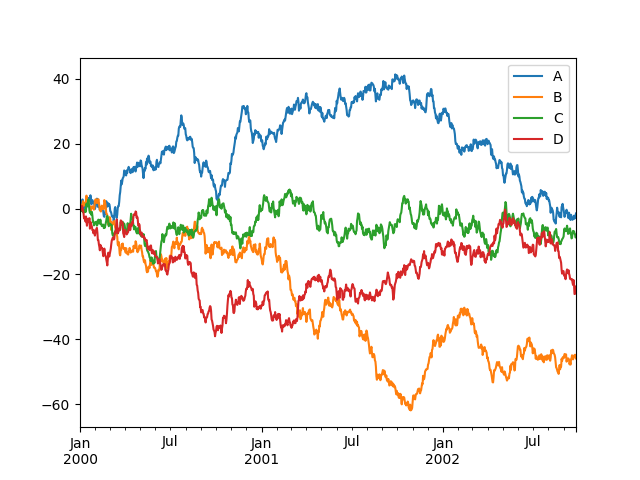

<AxesSubplot:>

In [10]:
# A randomly generated 4 columns of random values indexed with a date range to form a time series data.

index=pd.date_range("1/1/2000", periods=1000)
df = pd.DataFrame(np.random.randn(1000, 4), index=index, columns=list("ABCD"))
df = df.cumsum()
df.plot()

<IPython.core.display.Javascript object>


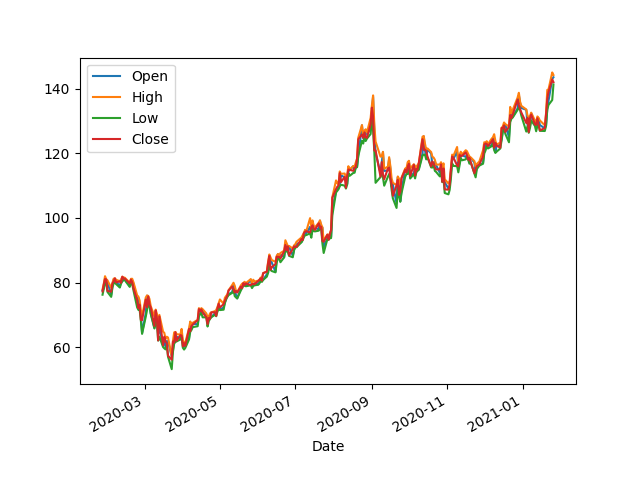

<AxesSubplot:xlabel='Date'>

In [11]:
# Plot a subdata with also 4 columns from the original data 
data2 = data[["Open", "High", "Low", "Close"]]
data2.plot()

Figure one: the volume (the last column has significient scale in comparision with other 5 columns (the straight line underneath the curve; the other 5 has very small diifences (you see one straight line )

<IPython.core.display.Javascript object>


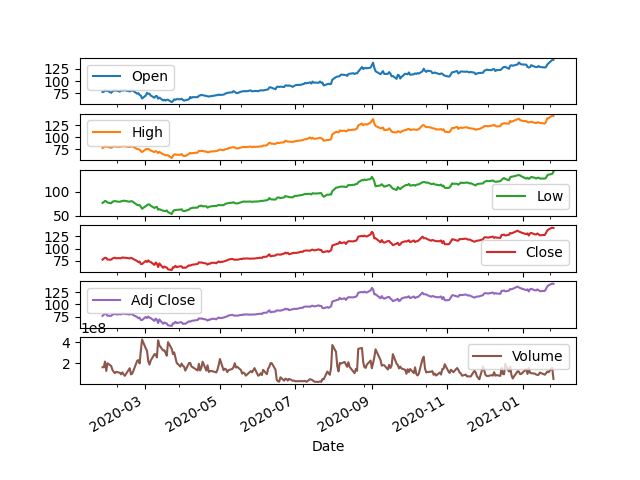

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

In [12]:
# use subplots = True to seperate them 
data.plot(subplots = True)

<IPython.core.display.Javascript object>


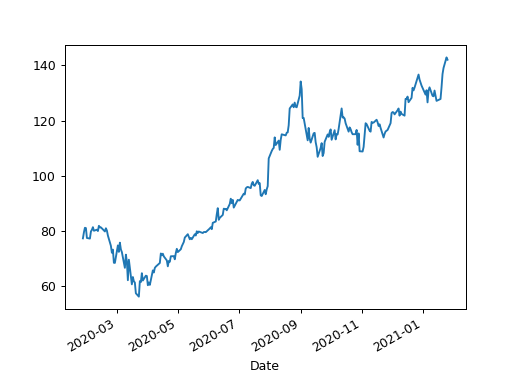

<AxesSubplot:xlabel='Date'>

In [13]:
# plot a single column (series) like "Close"
data['Close'].plot()

# Use Matplotlib is in an objective way

To solve multiple plots in one figure problem, we can use Matplotlib in an object-oriented way. 

The idea is we create objects first and do the plotting with their methods. Methods are the functions that come with the object. 

Generally, we create both a **figure** and an **axes** object with plt.subplots(). Then we use the ax.plot() method from our axes object to create the plot. We also use two more methods, ax.set_xlabel() and ax.set_ylabel() to label our axes. We can aslo use ax.set_title() to add a title if we want.

<IPython.core.display.Javascript object>


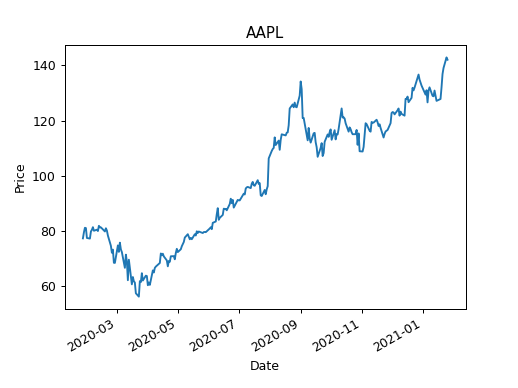

<AxesSubplot:title={'center':'AAPL'}, xlabel='Date', ylabel='Price'>

In [16]:
# create two objects fig and ax
fig, ax = plt.subplots()

ax.set_ylabel("Price")
ax.set_title("AAPL")

data['Close'].plot(ax=ax)

## Multiple axis in one figure

<IPython.core.display.Javascript object>


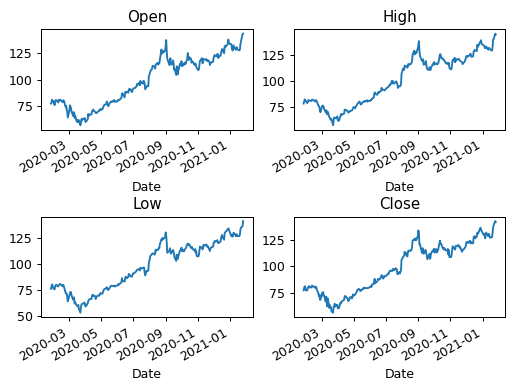

In [17]:
# plt.subplots(2, 2) creates a 2-by-2 grid of axis. You access the axis in ax by ax[0, 0] and similar for the other axis.
fig, ax = plt.subplots(2, 2)
data['Open'].plot(ax=ax[0, 0], title="Open")
data['High'].plot(ax=ax[0, 1], title="High")
data['Low'].plot(ax=ax[1, 0], title="Low")
data['Close'].plot(ax=ax[1, 1], title="Close")
plt.tight_layout()


## Horizontal bar plot

A bar plot can be created as follows, where we also make a time interval of the data we want by using .loc[].

<IPython.core.display.Javascript object>


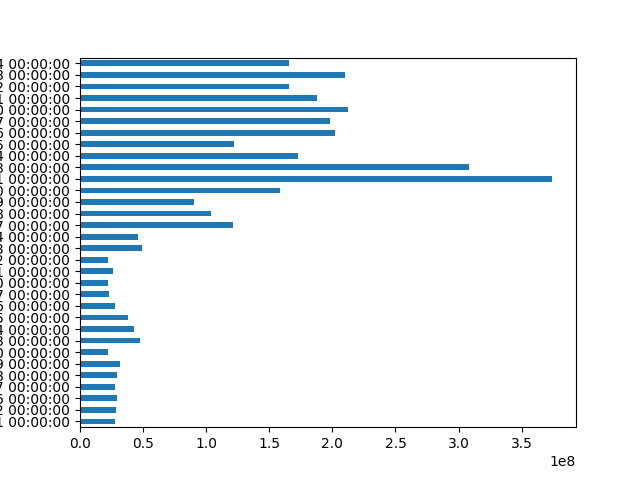

<AxesSubplot:ylabel='Date'>

In [13]:
fig, ax = plt.subplots()
data['Volume'].loc['2020-07-01':'2020-08-15'].plot.barh(ax=ax)

# End